# E-Commerce Product Delivery Prediction  

This project aims to predict whether a product from an e-commerce company will be delivered on time. Additionally, it analyzes various factors influencing delivery timelines and examines customer behavior patterns.

### Context
An international e-commerce company specializing in electronic products aims to gain key insights from its customer database. To achieve this, they plan to leverage advanced machine learning techniques to analyze customer behavior and trends.



| Variable | Description |
| --- | --- |
|ID|ID Number of Customers|
|Warehouse_block|The Company have big Warehouse which is divided into block such as A,B,C,D,E|
|Mode_of_Shipment|The Company Ships the products in multiple way such as Ship, Flight and Road|
|Customer_care_calls|The number of calls made from enquiry for enquiry of the shipment|
|Customer_rating|The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)|
|Cost_of_the_Product|Cost of the Product in US Dollars|
|Prior_purchases|The Number of Prior Purchase|
|Product_importance|The company has categorized the product in the various parameter such as low, medium, high|
|Gender|Male and Female|
|Discount_offered|Discount offered on that specific product|
|Weight_in_gms|It is the weight in grams|
|Reached.on.Time_Y.N|It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time|


In [5]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Loading the dataset
df = pd.read_csv('E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Data Preprocessing 1

In [7]:
#Checking the shape of the dataset
df.shape

(10999, 12)

In [8]:
#Checking data types of the columns
df.dtypes

,0
ID,int64
Warehouse_block,object
Mode_of_Shipment,object
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,object
Gender,object
Discount_offered,int64


Dropping column ID because it is an index column

In [9]:
#Drop column
df.drop(['ID'], axis=1, inplace=True)

In [10]:
#Checking for null/missing values
df.isnull().sum()

,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0
Weight_in_gms,0


In [11]:
#Checking for duplicate values
df.duplicated().sum()

0

##### Descriptive Statistics

In [12]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [13]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the relationship between the target variable and the other variables. I will also be looking at the distribution of the variables across the dataset, in order to understand the data in a better way.

#### Customer Gender Distribution

Text(0.5, 1.0, 'Gender Distribution')

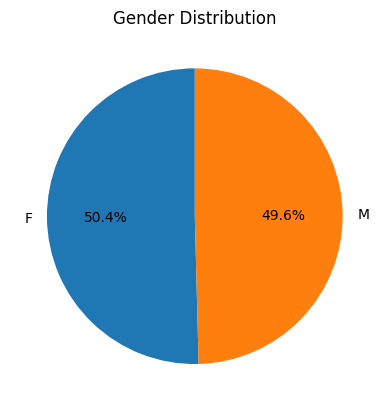

In [14]:
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

The dataset has the equal number of both males and female customers, with percentage of 49.6% and 50.4% respectively.

#### Product Properties

Text(0.5, 1.0, 'Cost of the Product')

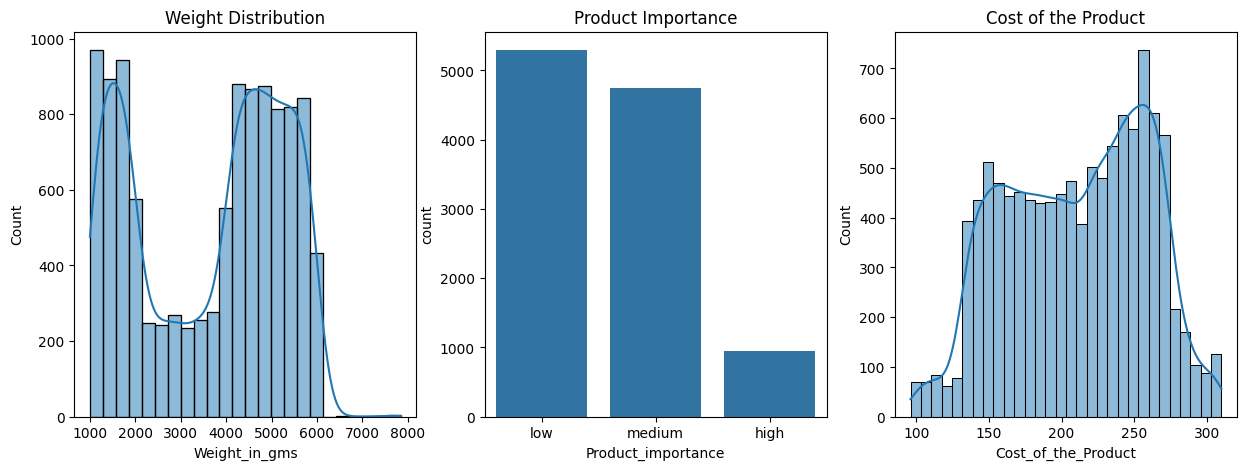

In [15]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

These three graphs explain the distribution of product properties - Weight, Cost and Importance in the dataset. Firstly, looking at the weight distribution, we can see that the products weighing between 1000-2000 grams and 4000-6000 grams are more in number. This means that the company is selling more of the products in these weight ranges. The second graph is about the product importance, where majority of the products have low or medium importance. The third graph is about the cost of the product. Third graph is about the cost distribution of the products, where there is increased distribution between 150-200 and 225-275 dollars.

From this, I conclude that majority of the products are lighter than 6000 grams, have low or medium importance and costs between 150-275 dollars.

#### Logistics

Text(0.5, 1.0, 'Reached on Time')

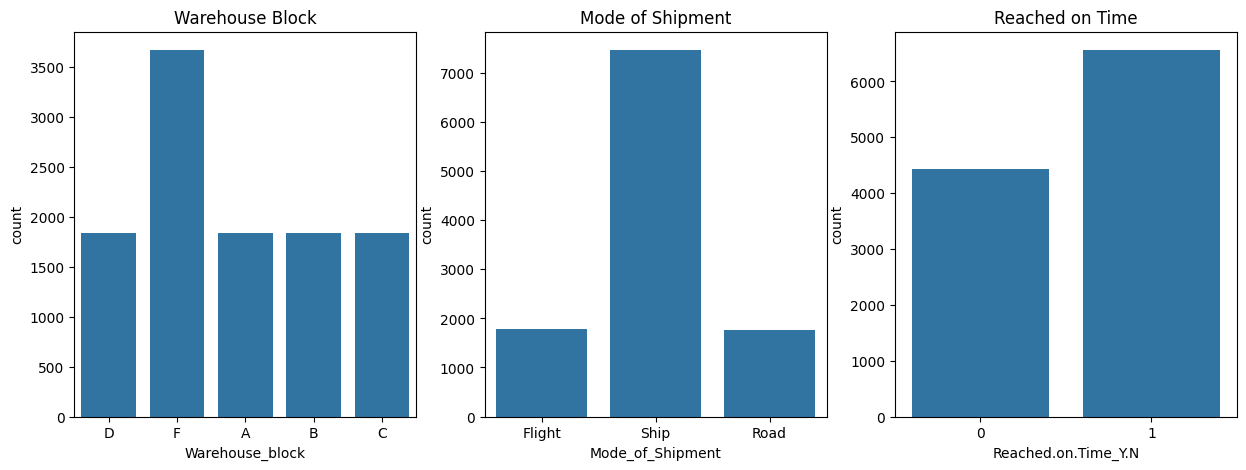

In [16]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x = 'Reached.on.Time_Y.N', data = df, ax=ax[2]).set_title('Reached on Time')

The above graphs visualizes the logistics and delivery of the product. In the first graph, we can see that the number of products from warehouse F is most i.e. 3500, whereas rest of the warehouses have nearly equal number of products. The second graph is about the shipment of the product, where majority of the products are shipped via Ship whereas nearly 2000 products are shipped by flight and road. Third graph is about the timely delivery of the product where we can see that the number of products delivered on time is more than the number of products not delivered on time.

From all the above graph, I assume that warehouse F is close to seaport, because warehouse F has the most number of products and most of the products are shipped via ship.

#### Customer Experience

Text(0.5, 1.0, 'Discount Offered')

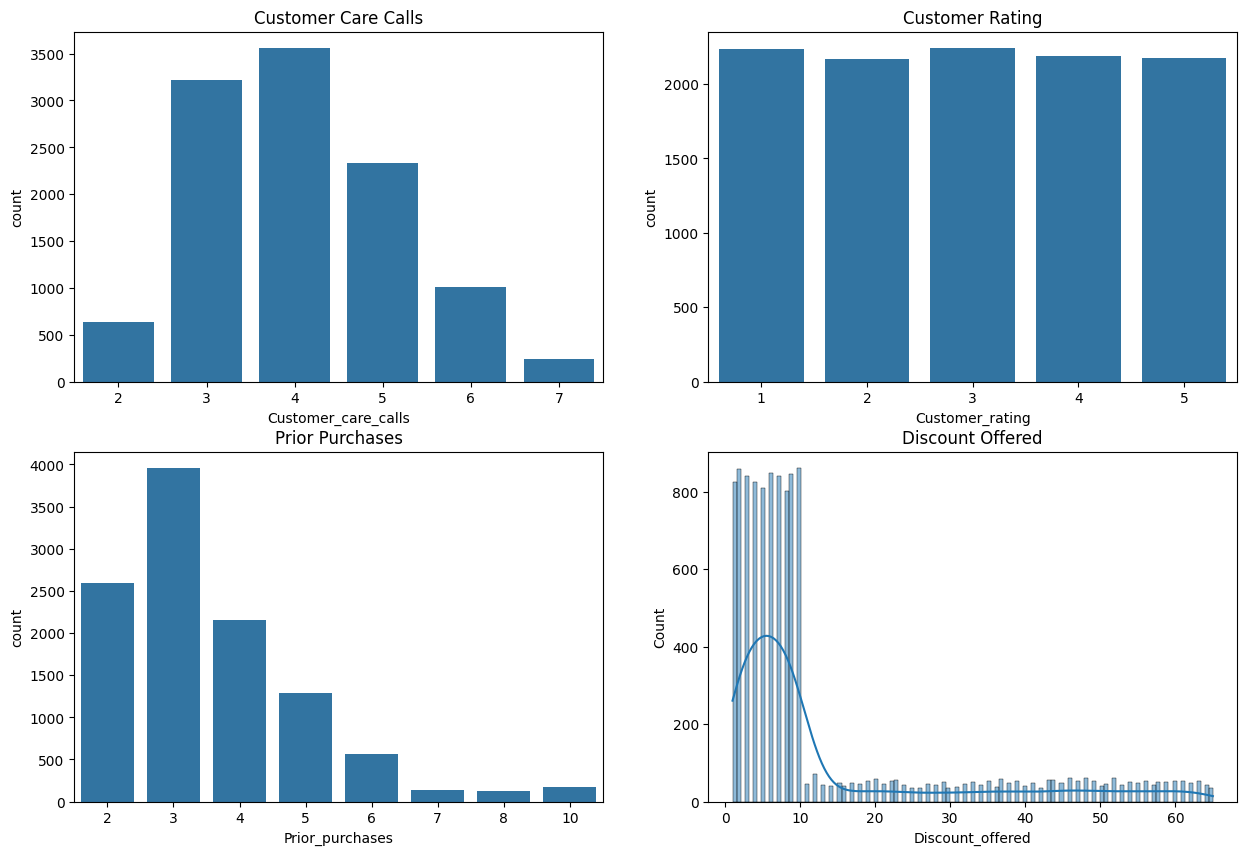

In [17]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

The above graphs visualizes the customer experience based on their customer care calls, rating, prior purchases and discount offered. The first graph shows the number of customer care calls done by the customers, where we can see that majority of the customers have done 3-4 calls, which could be a potential indicator, which shows that customers could be facing with the product delivery. In the second graph, we can see that the count of customer ratings across all ratings is same, but there are little more count in rating 1, which means customers are not satisfied with the service.

The third graph is about the prior purchases done by the customers, where we can see that majority of the customers have done 2-3 prior purchases, which means that customers who are having prior purchases, they are satisfied with the service, and they are buying more products. The fourth graph is about the discount offered on the products, where we can see that majority of the products have 0-10% discount, which means that the company is not offering much discount on the products.

#### Customer Gender and Product Delivery

Text(0.5, 1.0, 'Gender vs Reached on Time')

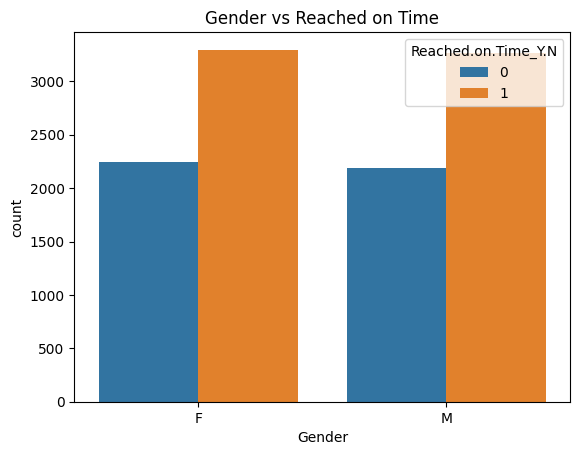

In [18]:
sns.countplot(x = 'Gender', data = df, hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')

The number of products timely delivered for both the genders is same, which means there is no relation of customer gender and product delivery.

#### Product Properties and Product Delivery

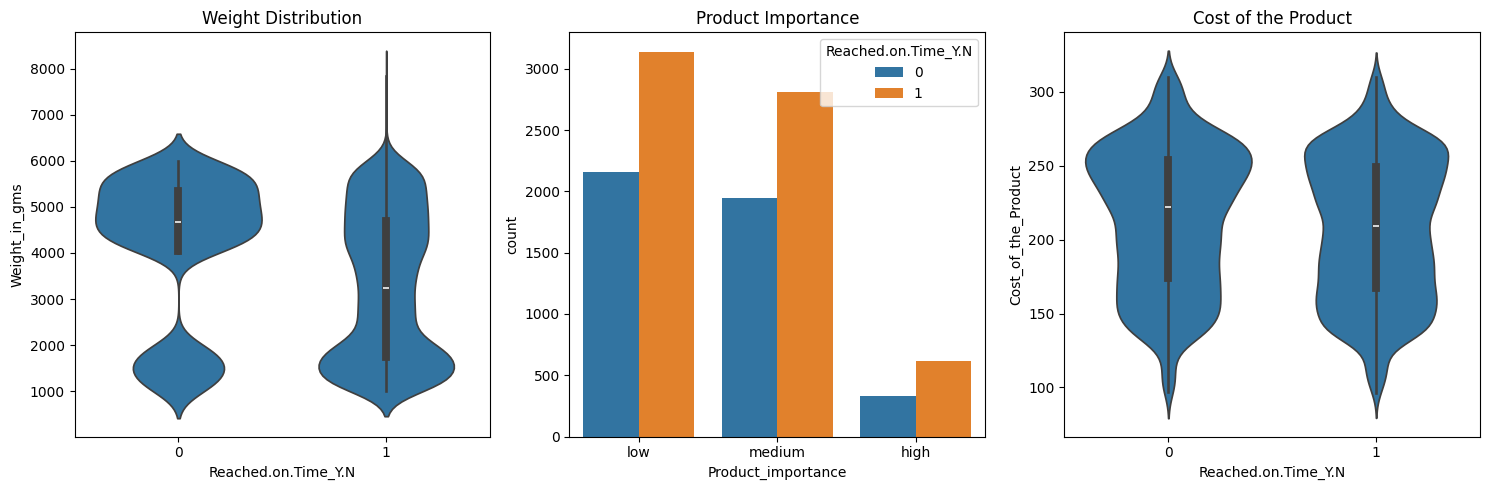

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(y=df['Weight_in_gms'], ax=ax[0], x=df['Reached.on.Time_Y.N']).set_title('Weight Distribution')
sns.countplot(x='Product_importance', data=df, ax=ax[1], hue='Reached.on.Time_Y.N').set_title('Product Importance')
sns.violinplot(y=df['Cost_of_the_Product'], ax=ax[2], x=df['Reached.on.Time_Y.N']).set_title('Cost of the Product')

plt.tight_layout()
plt.show()


The above plots visualizes the relationship between product properties and product delivery. From the first graph, it is quite clear that product weight has an impact of timely delivery of the product. Products that weight more than 4500 grams are not delivered on time, in addition to that more products that weight between 2500 - 3500 grams are delivered timely. The second graph is about the product importance and product delivery, where we can see that there is no major difference between the product delivery based on the product importance. The third graph shows the relationship between the cost of the product and product delivery, where we can see that products that cost more than 250 have higher count of not delivered on time.

From this I conclude that product weight and cost has an impact on the product delivery.

#### Logistics and Product Delivery

Text(0.5, 1.0, 'Mode of Shipment')

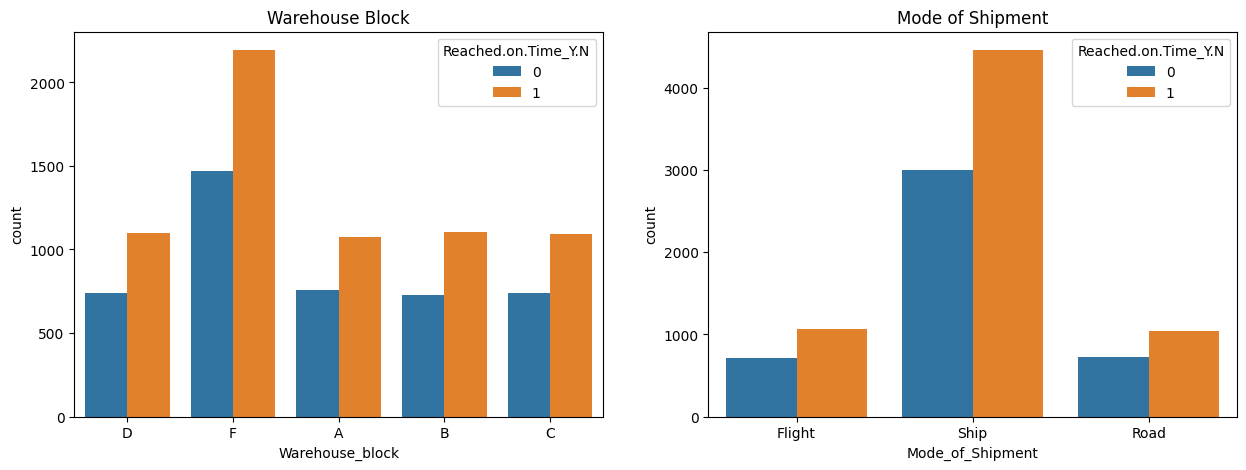

In [23]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

These graphs explain the relationship between the Logistic and timely delivery of the product. Since most of the products are shipped from warehouse F, I assumed that warehouse F is close to seaport, and most of the products are shipped via ship. In both the graphs, the difference between the number of products delivered on time and not delivered on time is constant across all the warehouse blocks and mode of shipment. This means that the logistic and mode of shipment has no impact on the product delivery.

#### Customer Experience and Product Delivery

Text(0.5, 1.0, 'Discount Offered')

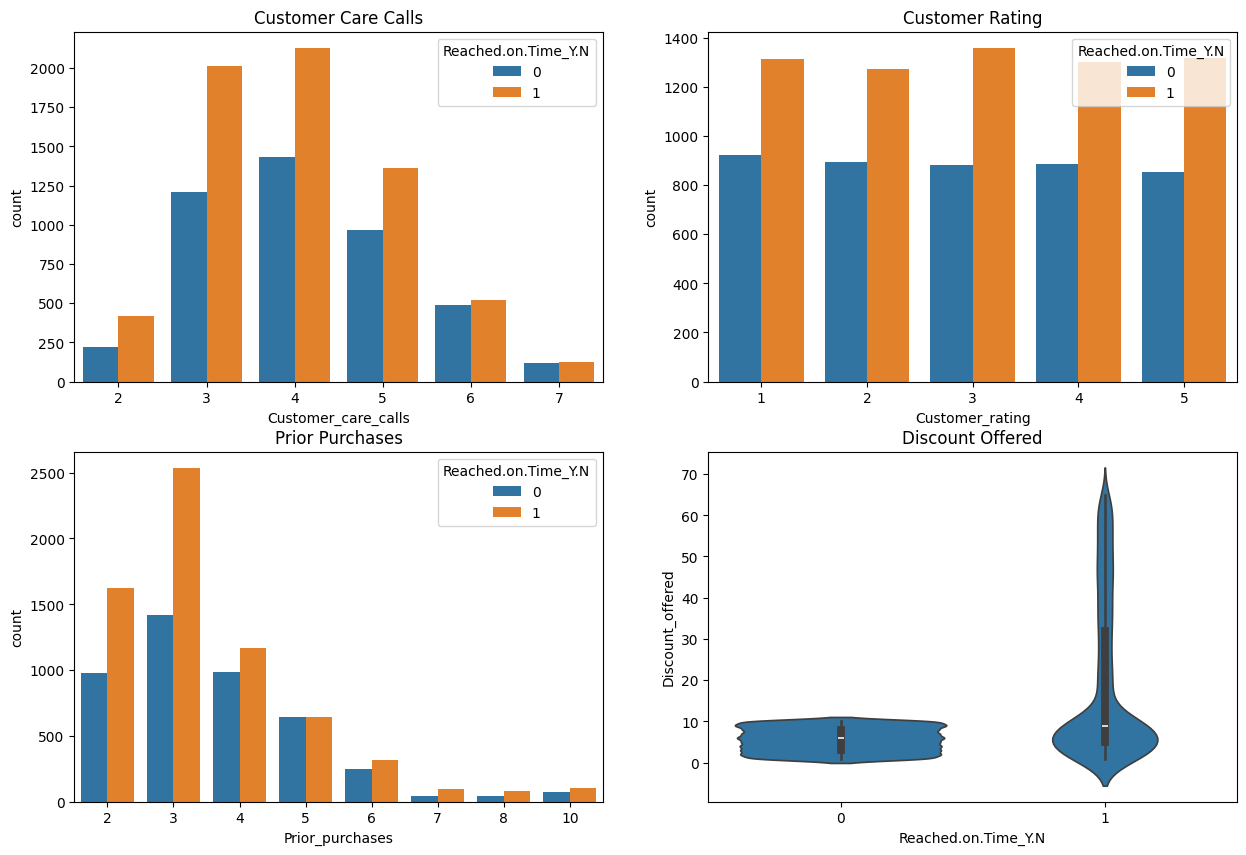

In [24]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')

It is important to understand the customer experience and respond to services provided by the E-Commerce company. The above graphs explain the relationship between customer experience and product delivery. The first graph is about the customer care calls and product delivery, where we that the difference in timely and late delivery of the product decreases with increase in the number of calls by the customer, which means that with the delay in product delivery the customer gets anxious about the product and calls the customer care. The second graph is about the customer rating and product delivery, where we can see that customers who  rating have higher count of products delivered on time.

The third graph is about the customer's prior purchase, which also shows that customers who have done more prior purchases have higher count of products delivered on time and this is the reason that they are purchasing again from the company. The fourth graph is about the discount offered on the product and product delivery, where we can see that products that have 0-10% discount have higher count of products delivered late, whereas products that have discount more than 10% have higher count of products delivered on time.

## Data Preprocessing 2

#### Label Encoding the Categorical Variables

In [25]:
from sklearn.preprocessing import LabelEncoder

#Label encoding object
le = LabelEncoder()

#columns for label encoding
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

#label encoding
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


## Correlation Matrix Heatmap

<Axes: >

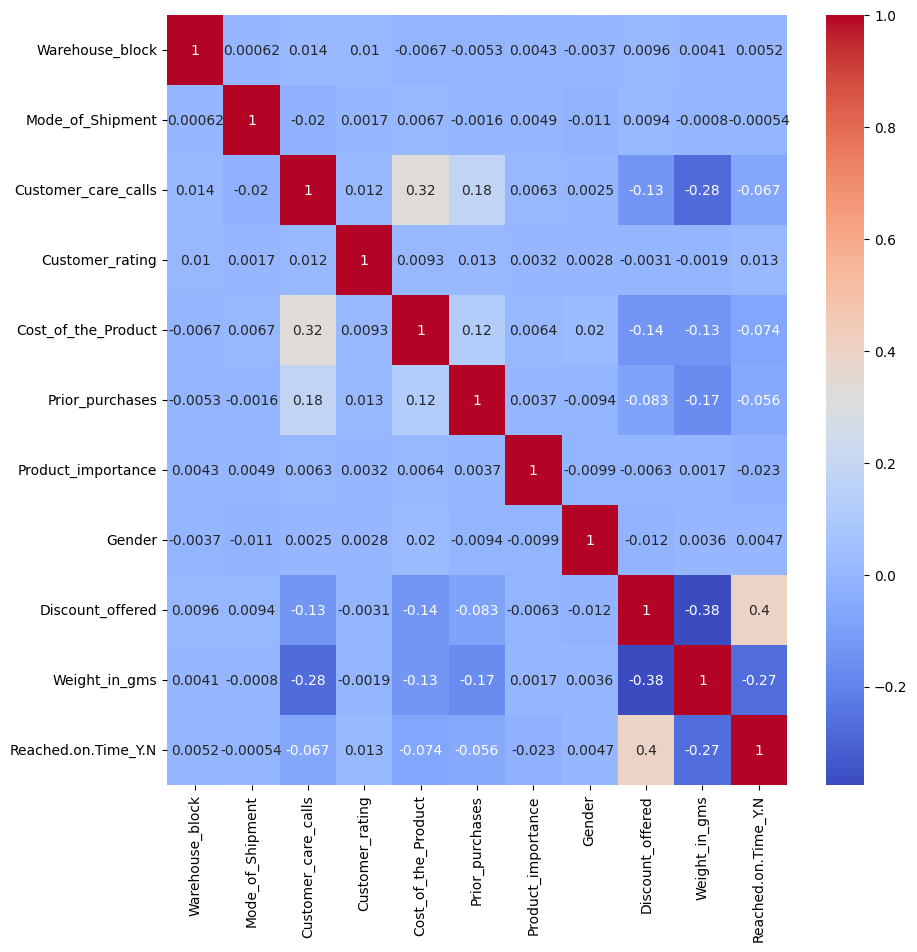

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In the correlation matrix heatmap, we can see that there is positive correlation between cost of product and number of customer care calls.

<Axes: xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

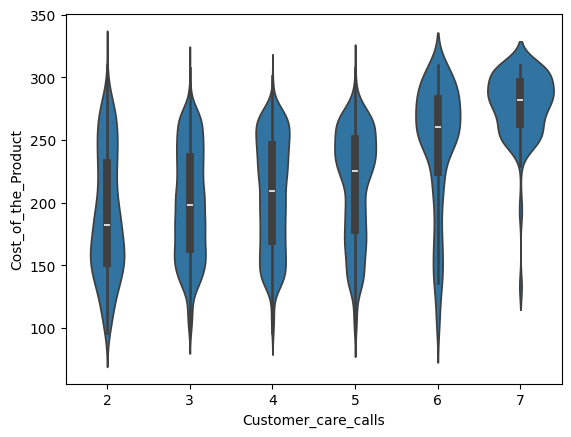

In [27]:
sns.violinplot(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data = df)

It is clear that customer are more concern regarding the delivery of the product when the cost of the product is high. This is the reason that they call the customer care to know the status of the product. So, it is important to make sure the delivery of the product is on time when the cost of the product is high.

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

## Model Building

I will be using the following models to predict the product delivery:

- Random Forest Classifier
- Decision Tree Classifier
- Logistic Regression
- K Nearest Neighbors

#### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

In [31]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


In [32]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [33]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.7253096942834413


In [34]:
#predicting the test set results
rfc_pred = rfc.predict(X_test)

#### Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

In [36]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [37]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [38]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  0.6913285600636436


In [39]:
#predicting the test set results
dtc_pred = dtc.predict(X_test)

#### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

In [41]:
#fitting the model
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
#Training accuracy
lr.score(X_train, y_train)

0.638254347084896

In [43]:
#predicting the test set results
lr_pred = lr.predict(X_test)

#### K Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

In [45]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
#training accuracy
knn.score(X_train, y_train)

0.7780429594272077

In [47]:
#predicting the test set results
knn_pred = knn.predict(X_test)

## Model Evaluation

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

Text(0.5, 1.0, 'KNN Classifier')

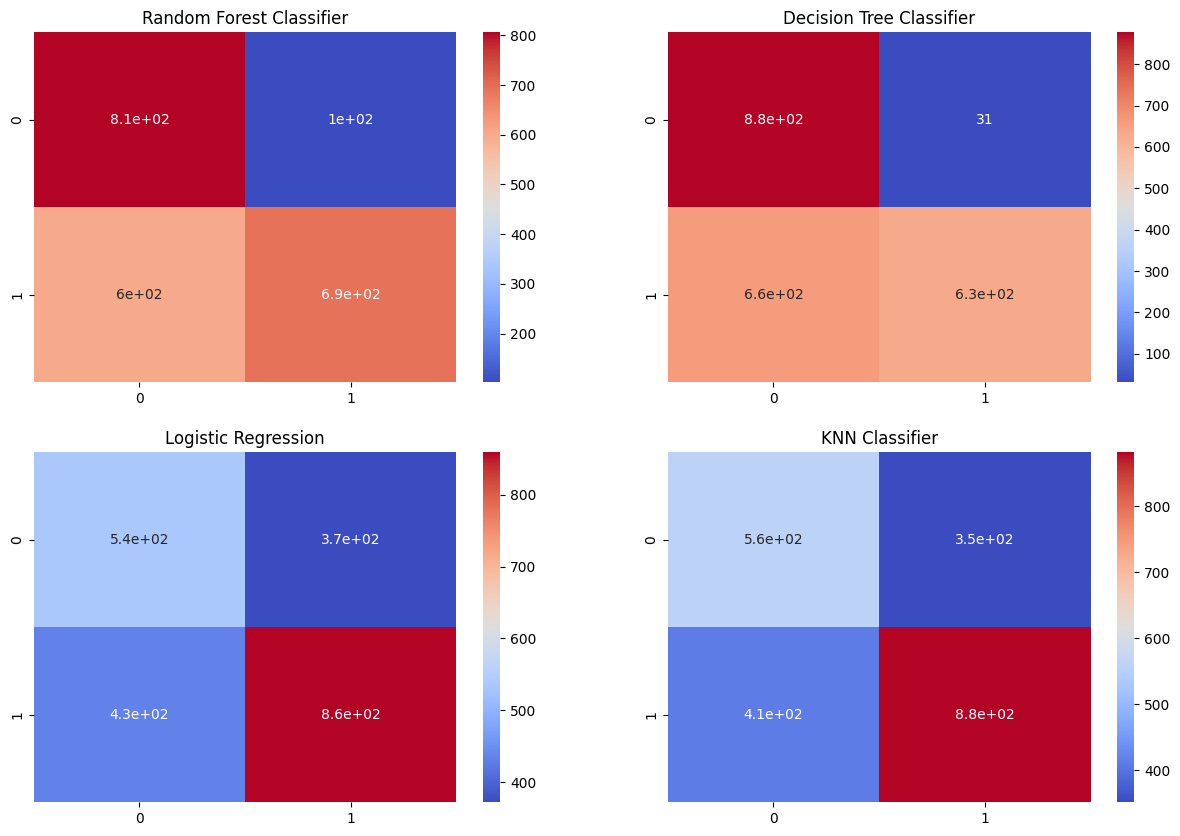

In [49]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')

In [50]:
#classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.89      0.70       908
           1       0.87      0.54      0.66      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.65      1292

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.69      0.68      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.55      0.59      0.57       908
           1       0.70      0.66      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.63      0.63      0.63      

##### Model Comparison

<ipython-input-51-5e41ec57e418>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')


Text(0, 0.5, 'Accuracy')

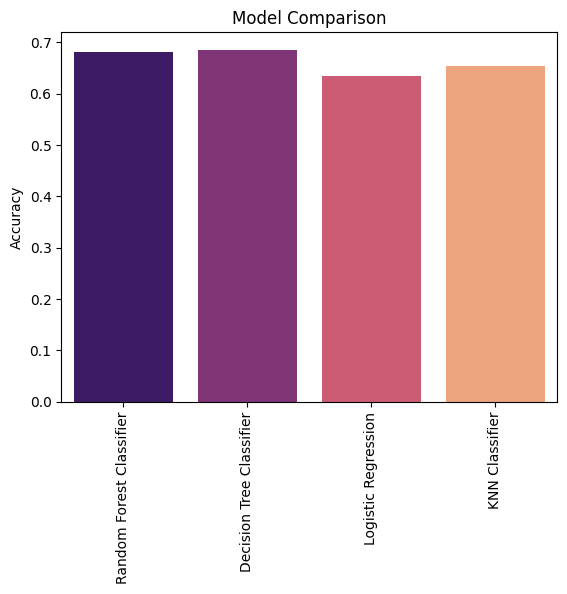

In [51]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

## Conclusion

The aim of the project was to predict whether the product from an e-commerce company will reach on time or not. This project also analyzes various factors that affect the delivery of the product as well as studies the customer behavior. From the exploratory data analysis, I found that the product weight and cost has an impact on the product delivery. Where product that weighs between 2500 - 3500 grams and having cost less than 250 dollars had higher rate of being delivered on time. Most of the products were shipped from warehouse F though ship, so it is quite possible that warehouse F is close to a seaport.

The customer's behaviour also help in predicting the timely delivery of the product. The more the customer calls, higher the chances the product delivery is delayed. Interestingly, the customers who have done more prior purchases have higher count of products delivered on time and this is the reason that they are purchasing again from the company. The products that have 0-10% discount have higher count of products delivered late, whereas products that have discount more than 10% have higher count of products delivered on time.

Coming to the machine learning models, the decision tree classifier as the highest accuracy among the other models, with accuracy of 69%. The random forest classifier and logistic regression had accuracy of 68% and 67% respectively. The K Nearest Neighbors had the lowest accuracy of 65%.